In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_New.csv')
test=pd.read_csv('test_New.csv')

In [3]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,52,Private,98926,HS-grad,9,Never-married,Other-service,Unmarried,White,Male,-3,0,44,United-States,<=50K
1,76,Self-emp-not-inc,132607,Bachelors,12,Married-civ-spouse,Sales,Husband,White,Male,7527,0,44,United-States,>50K
2,40,Private,243258,Bachelors,13,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,19,0,57,United-States,>50K
3,76,State-gov,181259,Bachelors,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,7720,0,44,United-States,>50K
4,36,Self-emp-inc,115379,Masters,13,Divorced,Exec-managerial,Not-in-family,White,Male,12,0,58,United-States,<=50K


In [4]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,hours-per-week
0,40,Without-pay,106899,HS-grad,8,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,<=50K,NaN
1,38,Private,157191,HS-grad,8,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,United-States,<=50K,NaN
2,76,Self-emp-not-inc,102547,Some-college,10,Widowed,Sales,Not-in-family,Asian-Pac-Islander,Female,32,0,United-States,<=50K,NaN
3,38,Self-emp-not-inc,44426,HS-grad,9,Never-married,Sales,Unmarried,White,Male,30,0,United-States,>50K,NaN
4,62,Without-pay,33230,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,-4,0,United-States,<=50K,NaN


In [5]:
#shape of dataframe
train.shape,test.shape

((18944, 15), (8119, 15))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             18944 non-null  int64 
 1   workclass       18944 non-null  object
 2   fnlwgt          18944 non-null  int64 
 3   education       18944 non-null  object
 4   education-num   18944 non-null  int64 
 5   marital-status  18944 non-null  object
 6   occupation      18944 non-null  object
 7   relationship    18944 non-null  object
 8   race            18944 non-null  object
 9   sex             18944 non-null  object
 10  capital-gain    18944 non-null  int64 
 11  capital-loss    18944 non-null  int64 
 12  hours-per-week  18944 non-null  int64 
 13  native-country  18944 non-null  object
 14  income          18944 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.2+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8119 entries, 0 to 8118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8119 non-null   int64  
 1   workclass       8119 non-null   object 
 2   fnlwgt          8119 non-null   int64  
 3   education       8119 non-null   object 
 4   education-num   8119 non-null   int64  
 5   marital-status  8119 non-null   object 
 6   occupation      8119 non-null   object 
 7   relationship    8119 non-null   object 
 8   race            8119 non-null   object 
 9   sex             8119 non-null   object 
 10  capital-gain    8119 non-null   int64  
 11  capital-loss    8119 non-null   int64  
 12  native-country  8119 non-null   object 
 13  income          8119 non-null   object 
 14  hours-per-week  0 non-null      float64
dtypes: float64(1), int64(5), object(9)
memory usage: 951.6+ KB


# NULL value check

In [9]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
test.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
native-country       0
income               0
hours-per-week    8119
dtype: int64

# Data cleaning

In [11]:
test.drop('hours-per-week', axis=1, inplace=True)

# Data pre processing

In [12]:
train.workclass.value_counts()

 Private             11700
 Self-emp-not-inc     3089
 Local-gov            1159
 Federal-gov           995
 Self-emp-inc          861
 State-gov             819
 Without-pay           258
 Never-worked           63
Name: workclass, dtype: int64

In [13]:
train.education.value_counts()

 HS-grad         5462
 Some-college    3745
 Bachelors       3337
 11th            1000
 Masters          941
 Assoc-acdm       796
 Assoc-voc        769
 7th-8th          750
 Prof-school      476
 Doctorate        387
 10th             386
 5th-6th          319
 9th              200
 12th             184
 1st-4th          148
 Preschool         44
Name: education, dtype: int64

In [14]:
train['marital-status'].value_counts()

 Married-civ-spouse       8311
 Never-married            5857
 Divorced                 2697
 Separated                 772
 Widowed                   624
 Married-spouse-absent     461
 Married-AF-spouse         222
Name: marital-status, dtype: int64

In [15]:
train.occupation.value_counts()

 Adm-clerical         3957
 Prof-specialty       2951
 Other-service        2134
 Sales                2046
 Craft-repair         1901
 Exec-managerial      1543
 Handlers-cleaners    1126
 Machine-op-inspct     920
 Transport-moving      790
 Farming-fishing       574
 Tech-support          504
 Protective-serv       405
 Priv-house-serv        91
 Armed-Forces            2
Name: occupation, dtype: int64

In [16]:
train.relationship.value_counts()

 Husband           7164
 Unmarried         3557
 Not-in-family     3428
 Own-child         2768
 Wife              1090
 Other-relative     937
Name: relationship, dtype: int64

In [17]:
train.race.value_counts()

 White                 12682
 Black                  3565
 Asian-Pac-Islander     1728
 Amer-Indian-Eskimo      491
 Other                   478
Name: race, dtype: int64

In [18]:
train.sex.value_counts()

 Male      10727
 Female     8217
Name: sex, dtype: int64

In [19]:
train['native-country'].value_counts()

 United-States                 16000
 South                           342
 Mexico                          329
 Cuba                            321
 Puerto-Rico                     283
 Jamaica                         254
 Honduras                        247
 Canada                          236
 England                         165
 India                           125
 Philippines                     112
 Taiwan                           49
 Dominican-Republic               48
 Vietnam                          42
 Germany                          34
 China                            29
 Haiti                            27
 Poland                           26
 Italy                            24
 Guatemala                        24
 Japan                            22
 El-Salvador                      22
 Laos                             19
 Columbia                         19
 Iran                             17
 Thailand                         15
 Yugoslavia                       13
 

In [21]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,18944.0,39.266470,13.395878,14.0,28.00,40.0,47.0,99.0
fnlwgt,18944.0,164292.035156,93425.986084,8019.0,98530.75,152895.5,215541.0,772988.0
education-num,18944.0,9.479043,2.830047,2.0,8.00,9.0,12.0,16.0
capital-gain,18944.0,577.476510,2414.473217,-58.0,-5.00,5.0,17.0,16193.0
capital-loss,18944.0,33.082823,248.521486,-2.0,0.00,0.0,0.0,2437.0
hours-per-week,18944.0,40.119299,11.124649,1.0,35.00,39.0,44.0,102.0


In [23]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8119.0,39.129573,13.183245,14.0,28.0,40.0,47.0,93.0
fnlwgt,8119.0,164595.754773,95241.110265,2097.0,99101.0,150989.0,215068.5,794888.0
education-num,8119.0,9.433305,2.838288,0.0,8.0,9.0,12.0,16.0
capital-gain,8119.0,563.732972,2393.666344,-60.0,-5.0,5.0,17.0,15866.0
capital-loss,8119.0,34.185860,252.497339,-2.0,0.0,0.0,0.0,2264.0


In [25]:
train.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [26]:
train.select_dtypes(include='number').columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [27]:
train_scaled = train.copy()
test_scaled = test.copy()

In [28]:
#Label encoding
le = LabelEncoder()
cat_var = train.select_dtypes(include='object').columns

for i in cat_var:
    train_scaled[i] = pd.DataFrame(le.fit_transform(train[i]))
    
for i in cat_var:
    test_scaled[i] = pd.DataFrame(le.fit_transform(test[i]))

In [29]:
#Scaling
std = StandardScaler()

#Train set
scaled_train = pd.DataFrame(std.fit_transform(train[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]), 
                                              columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'])

train_scaled = train_scaled.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'], axis=1)
train_scaled = train_scaled.merge(scaled_train, left_index=True, right_index=True, how="left")
    
#Test set
scaled_test = pd.DataFrame(std.fit_transform(test[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]),
                                             columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'])

test_scaled = test_scaled.drop(columns=['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss'], axis=1)
test_scaled = test_scaled.merge(scaled_test, left_index=True, right_index=True, how="left")

In [30]:
train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
workclass,18944.0,3.272487e+00,1.396888,0.000000,3.000000,3.000000,4.000000,7.000000
education,18944.0,9.947741e+00,3.955957,0.000000,9.000000,11.000000,12.000000,15.000000
marital-status,18944.0,2.600243e+00,1.541378,0.000000,2.000000,2.000000,4.000000,6.000000
occupation,18944.0,5.647065e+00,4.182706,0.000000,2.000000,6.000000,9.000000,13.000000
relationship,18944.0,1.756968e+00,1.746348,0.000000,0.000000,1.000000,3.000000,5.000000
race,18944.0,3.221073e+00,1.186156,0.000000,2.000000,4.000000,4.000000,4.000000
sex,18944.0,5.662479e-01,0.495605,0.000000,0.000000,1.000000,1.000000,1.000000
hours-per-week,18944.0,4.011930e+01,11.124649,1.000000,35.000000,39.000000,44.000000,102.000000
native-country,18944.0,3.511249e+01,8.178786,0.000000,38.000000,38.000000,38.000000,40.000000
income,18944.0,2.864759e-01,0.452126,0.000000,0.000000,0.000000,1.000000,1.000000


In [31]:
test_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
workclass,8119.0,3.271585e+00,1.396250,0.000000,3.000000,3.000000,4.000000,7.000000
education,8119.0,9.976352e+00,3.979181,0.000000,9.000000,11.000000,12.000000,15.000000
marital-status,8119.0,2.588250e+00,1.552582,0.000000,2.000000,2.000000,4.000000,6.000000
occupation,8119.0,5.627417e+00,4.194518,0.000000,2.000000,6.000000,9.000000,13.000000
relationship,8119.0,1.766104e+00,1.741938,0.000000,0.000000,1.000000,3.000000,5.000000
race,8119.0,3.223427e+00,1.186621,0.000000,2.000000,4.000000,4.000000,4.000000
sex,8119.0,5.637394e-01,0.495951,0.000000,0.000000,1.000000,1.000000,1.000000
native-country,8119.0,3.324276e+01,7.764618,0.000000,36.000000,36.000000,36.000000,38.000000
income,8119.0,2.839020e-01,0.450918,0.000000,0.000000,0.000000,1.000000,1.000000
age,8119.0,1.603731e-16,1.000062,-1.906292,-0.844273,0.066029,0.597039,4.086532


<AxesSubplot:>

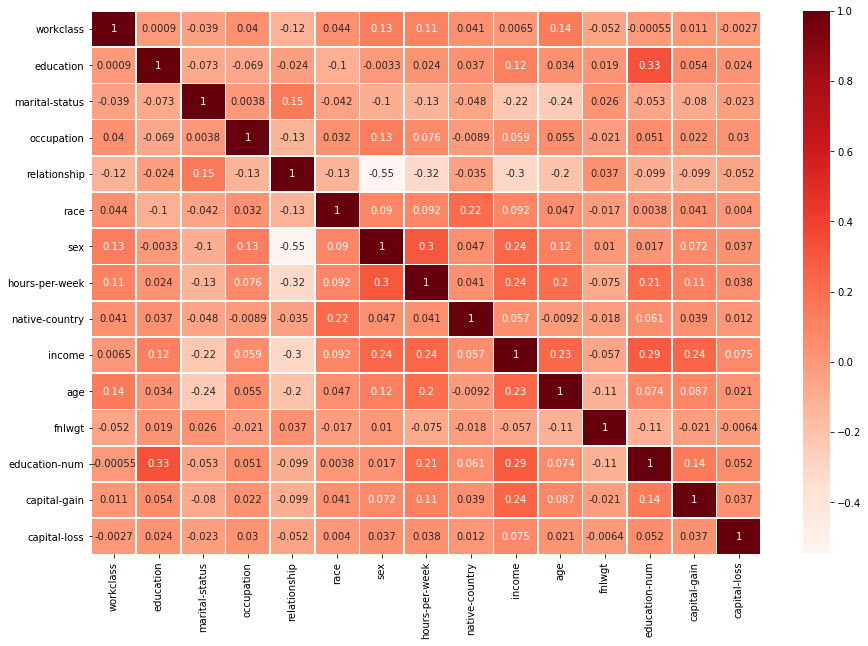

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(train_scaled.corr(),annot=True,cmap='Reds',linewidths=0.6)

<AxesSubplot:>

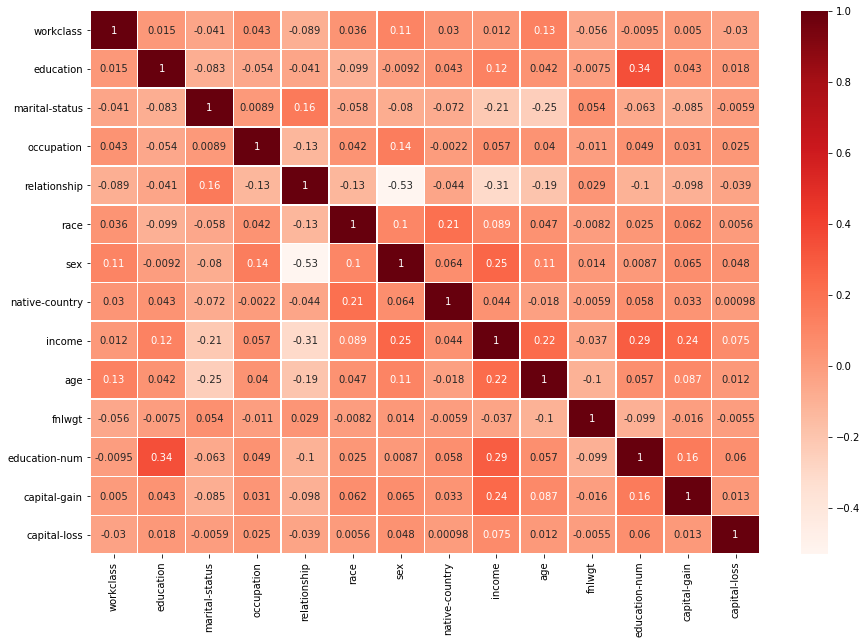

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(test_scaled.corr(), annot=True, cmap='Reds', linewidths=0.6)

# Model Building

In [34]:
#select features and Target

X=train_scaled.drop('hours-per-week',axis=1)
y=train_scaled['hours-per-week']

In [35]:
#20% data as validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [36]:
classifiers = [['LinearRegression :', LinearRegression()],
               ['KNeighbours :', KNeighborsRegressor()],
               ['DecisionTree :',DecisionTreeRegressor()],
               ['RandomForest :',RandomForestRegressor()], 
               ['GradientBoosting :', GradientBoostingRegressor()]]

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    #rmse = np.sqrt(mse)
    print(name, np.sqrt(mse))

LinearRegression : 10.312608551632598
KNeighbours : 10.92057701659106
DecisionTree : 14.368606361535669
RandomForest : 10.26380181954883
GradientBoosting : 9.985211717781644


In [37]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9.986863182492867

Text(0.5, 1.0, 'Feature Importance')

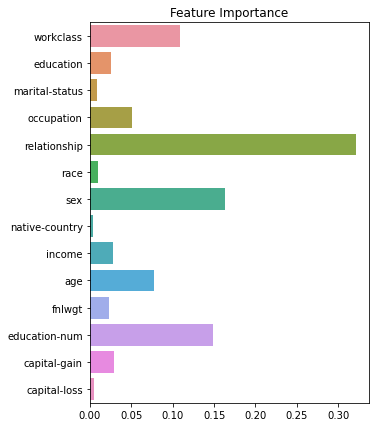

In [38]:
plt.figure(figsize=(5,7))
sns.barplot(gb.feature_importances_, X.columns)
plt.title('Feature Importance')

In [40]:
submission = pd.read_csv('submission.csv')
final_predictions = gb.predict(test_scaled)
submission['hours-per-week'] = final_predictions
submission.to_csv('work2.csv', index=False)